## DreliaCalc Report

In [1]:
# Date of Calculation
import arrow
dateformat='DD.MM.YYYY - HH:mm'
print(arrow.now('Europe/Vienna').format(dateformat))

14.03.2021 - 15:49


In [2]:
# Import packages
%cd ../dReliaCalc
import dmyplant2
import pandas as pd
import numpy as np
from pprint import pprint as pp

/Users/dieterchvatal/Documents/Anaconda/dReliaCalc


In [3]:
# Read Input CSV files (Upload first ... )
dval = pd.read_csv("input2.csv",sep=';', encoding='utf-8')
dval['val start'] = pd.to_datetime(dval['val start'], format='%d.%m.%Y')
failures = pd.read_csv("failures.csv",sep=';', encoding='utf-8')
failures['date'] = pd.to_datetime(failures['date'], format='%d.%m.%Y')

In [4]:
# identify yourself & create instances
from dmyplant2 import cred
mp = dmyplant2.MyPlant(0)
vl = dmyplant2.Validation(mp,dval, cui_log=True)                   

00 1145166 M02 POLYNT - 2 (1145166- ..
01 1175579 M05 REGENSBURG             
02 1184199 M01 ROCHE PENZBERG KWKK    
03 1198719 M02 ECOGEN ENERGY SYSTEM ..
04 1243360 M03 BMW REGENSBURG M3      
05 1243362 M02 REGENSBURG             
06 1250575 M01 ABINSK                 
07 1250578 M01 PROSPERITY WEAVING M ..
08 1310773 M01 SOTERNIX RENOVE        
09 1319133 M04 BMW MÜNCHEN            
10 1319138 M02 BMW MÜNCHEN            
11 1319151 M01 BMW MÜNCHEN            
12 1319157 M03 BMW MÜNCHEN            
13 1319997 M02 BMW MÜNCHEN            
14 1320022 M01 BMW MÜNCHEN            
15 1320030 M03 BMW MÜNCHEN            
16 1320072 M04 BMW LANDSHUT 4.10      
17 1320090 M01 BMW LANDSHUT M1        
18 1320114 M03 BMW LANDSHUT 4.10      
19 1325927 M01 LES COURONNERIES       
20 1339812 M01 DALOMA                 
21 1345851 M03 GAZ DE LACQ            
22 1352268 M06 BMW DINGOLFING 2.4     
23 1352323 M07 BMW DINGOLFING 2.4     
24 1361965 M01 FRONERI - FERENTINO    
25 1364066 M01 TOM VILLE 

## Success Run Plot, beta=1.21 & 1.5 with failures 

In [5]:
# dashboard
d=vl.dashboard
#d.sort_values(by = "oph parts",ascending=False)

In [6]:
# Read Values defined in tdef from Myplant into a pd.dataframe
#tdef = {161: 'Count_OpHour', 102: 'Power_PowerAct', 1258: 'OperationalCondition', 19074: 'Various_Bits_CollAlarm'}
tdef = {1258: 'OperationalCondition', 19074: 'Various_Bits_CollAlarm'}
ntable = [[e] + [e.get_dataItem(v) for v in tdef.values()] for e in vl.engines]
dft = pd.DataFrame(ntable, columns=['Name'] + list(tdef.values()))

In [7]:
# Summary of current Operation condition
from tabulate import tabulate
print(f"{dft.OperationalCondition.count()} Validation Engines observed.")
print(f"{dft[dft.OperationalCondition == 'Running'].OperationalCondition.count()} Validation Engines UP and Running")
print(f"{dft[dft.OperationalCondition != 'Running'].OperationalCondition.count()} Validation Engines not Running: \n")
print(tabulate(dft[dft.OperationalCondition != 'Running'], headers=dft.columns),"\n")

35 Validation Engines observed.
25 Validation Engines UP and Running
10 Validation Engines not Running: 

    Name                             OperationalCondition      Various_Bits_CollAlarm
--  -------------------------------  ----------------------  ------------------------
 2  1184199 M01 ROCHE PENZBERG KWKK  Available                                      0
 4  1243360 M03 BMW REGENSBURG M3    Not Available                                  0
 8  1310773 M01 SOTERNIX RENOVE      Available                                      0
11  1319151 M01 BMW MÜNCHEN          Not Available                                  0
14  1320022 M01 BMW MÜNCHEN          Not Available                                  0
16  1320072 M04 BMW LANDSHUT 4.10    Tripped                                        1
18  1320114 M03 BMW LANDSHUT 4.10    Available                                      0
25  1364066 M01 TOM VILLE            Available                                      0
31  1415410 M02 Salmmeir 2        

In [8]:
dtripped = dft[dft.OperationalCondition == 'Tripped']
for eng in dtripped.values:
    le = eng[0] 
    print(le)
    dtrips = le.batch_hist_alarms(p_severities=[800], p_offset=0, p_limit=5)
    dtrips['datetime'] = pd.to_datetime(dtrips['timestamp'] * 1000000.0).dt.strftime("%m-%d-%Y %H:%m")
    print(tabulate(dtrips[['datetime', 'message', 'name','severity']]))
    print()

1320072 M04 BMW LANDSHUT 4.10      
-  ----------------  -------------------------------------------------  ----  ---
0  03-09-2021 08:03  Gas proportioning valve CAN communication failure  3093  800
1  03-09-2021 08:03  SAFI CAN communication failure                     3331  800
2  03-08-2021 13:03  Jacket water pressure low                          1019  800
3  02-17-2021 04:02  Jacket water pressure low                          1019  800
4  02-17-2021 02:02  Jacket water pressure low                          1019  800
-  ----------------  -------------------------------------------------  ----  ---



In [9]:
#failures = pd.DataFrame([])
from tabulate import tabulate
print(tabulate(failures, headers=failures.columns))
#pd.options.display.max_columns = None
#failures

    date                   failures    serialNumber  comment
--  -------------------  ----------  --------------  --------------------------------------
 0  2020-12-28 00:00:00           1         1319151  München V008 M1 Z8 - cold scuff Reiber


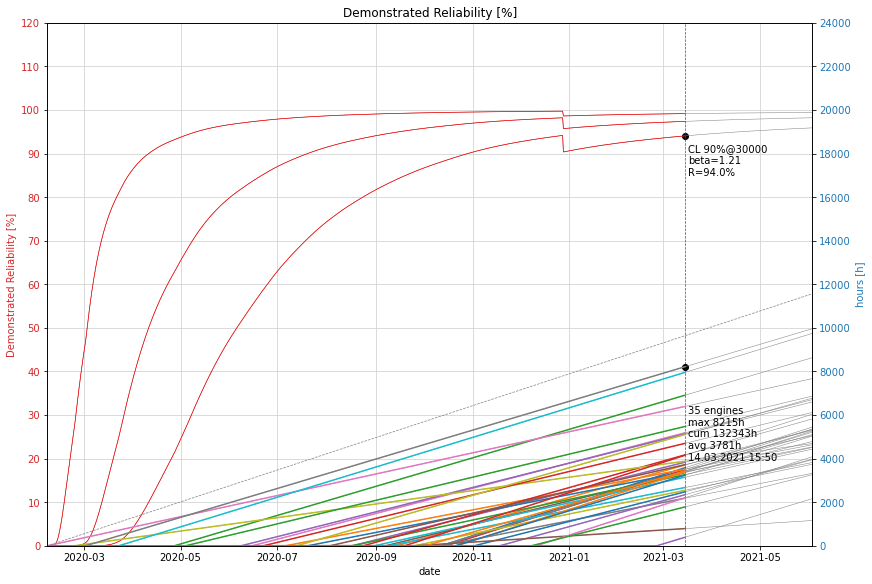

In [10]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.21, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

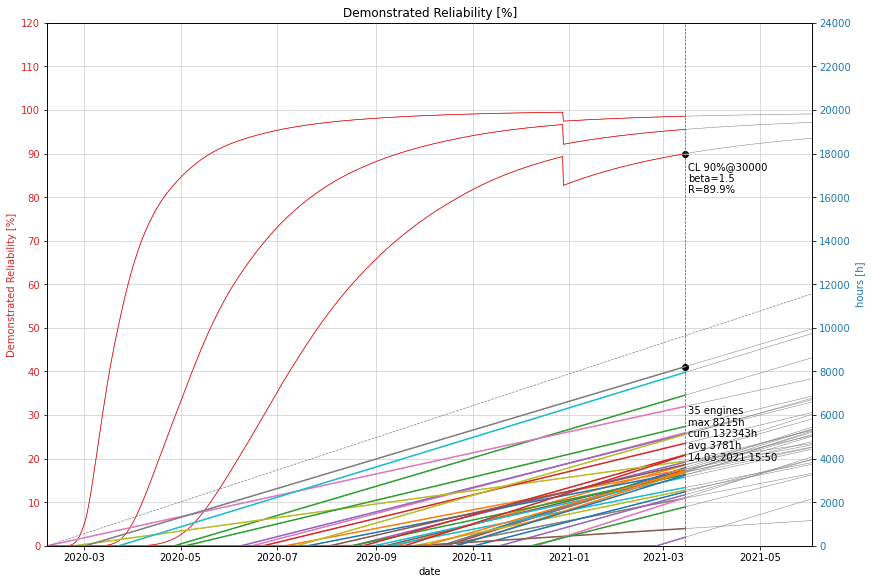

In [11]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.5, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

In [12]:
#failures = pd.DataFrame([])
#dmyplant2.demonstrated_Reliabillity_Plot(vl, 
#            beta=1.21, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

In [13]:
#dmyplant2.demonstrated_Reliabillity_Plot(vl, 
#            beta=1.5, T=30000, s=1000, ft=failures, cl=[10, 50, 90], factor=1.2)

<AxesSubplot:ylabel='Name'>

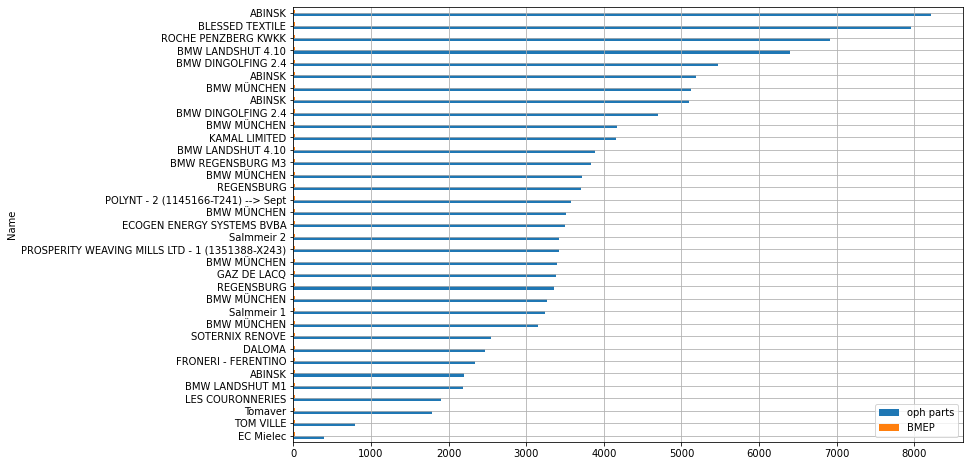

In [14]:
d[['Name','oph parts','BMEP']].set_index('Name').sort_values(by = "oph parts",ascending=True)[["oph parts","BMEP"]].plot.barh(figsize=(12,8),grid=True)

## Engines in oph ranges

In [15]:
import itertools as it
import matplotlib.pyplot as plt
#Calculate the number f engines in certain oph ranges
ranges = [2000,3000,4000,5000,6000,7000,8000,10000]
#Method 1: using cut and groupby
#r = d.groupby(pd.cut(d['oph parts'], ranges)).count()
#r['id']

#Method 2: simpler, direct using pd.value_counts
print(f"{d['oph parts'].count()} Engines in Validation fleet with total {d['oph parts'].sum()} Operation hours")
#d['oph parts'].value_counts(bins=ranges, sort=False).astype(int).plot.bar(ylim=(0,25))
erg = list(d['oph parts'].value_counts(bins=ranges, sort=False).astype(int))
#pd.DataFrame(list(zip(reversed(ranges[:-1]),it.accumulate(list(reversed(erg))))),columns=['oph','engines'])
pd.DataFrame(zip(reversed(ranges[:-1]),it.accumulate(reversed(erg))),columns=['oph','engines'])

35 Engines in Validation fleet with total 132343 Operation hours


,oph,engines
0,8000,1
1,7000,2
2,6000,4
3,5000,8
4,4000,11
5,3000,26
6,2000,31


## Statistics by Engine Type

In [16]:
d.groupby( "Engine Type")['oph parts'].describe().fillna(0).astype(int)

,count,mean,std,min,25%,50%,75%,max
Engine Type,,,,,,,,
612,1,2474,0,2474,2474,2474,2474,2474
616,9,3176,781,1782,2545,3380,3705,4152
620,6,3676,2332,789,3175,3327,3484,7956
624,19,4169,1877,389,3331,3882,5155,8215


<AxesSubplot:xlabel='BMEP'>

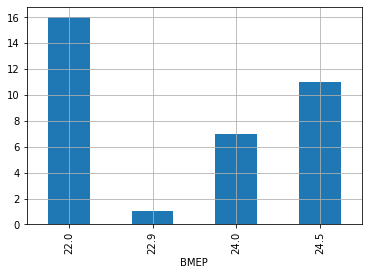

In [17]:
d.groupby( "BMEP")['Engine Type'].count().plot.bar(grid=True)

In [21]:
import plotly.express as px

#dd = d[['Name','oph parts','BMEP']].melt()
dd = d.sort_values(by = "oph parts",ascending=True)


In [22]:
px.bar(dd, x="BMEP", y="oph parts")

<AxesSubplot:ylabel='BMEP'>

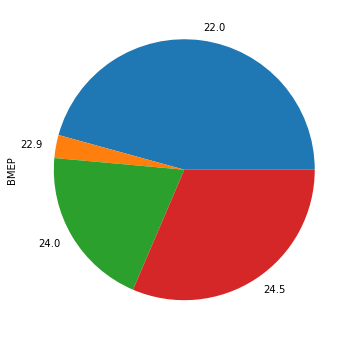

In [23]:
d.groupby( "BMEP")['Engine Type'].count().plot.pie(ylabel="BMEP",figsize=(6,6))

In [24]:
d.pivot(columns='Engine Type',values='BMEP').agg(['count','min','max']).round(1)

,612,616,620,624
count,1.0,9.0,6.0,19.0
min,22.0,22.0,22.0,22.9
max,22.0,22.0,22.0,24.5


## Statistics by Engine Version

In [25]:
d.groupby( "Engine Version")['oph parts'].describe().fillna(0).astype(int)

,count,mean,std,min,25%,50%,75%,max
Engine Version,,,,,,,,
F01,5,3404,217,3146,3264,3391,3515,3705
F03,1,1782,0,1782,1782,1782,1782,1782
F11,1,2545,0,2545,2545,2545,2545,2545
F12,1,3496,0,3496,3496,3496,3496,3496
H01,12,4562,1697,2184,3686,4434,5215,8215
H02,2,3648,4609,389,2018,3648,5278,6908
H12,1,1899,0,1899,1899,1899,1899,1899
J01,2,3595,337,3356,3475,3595,3714,3834
J101,2,6054,2689,4152,5103,6054,7005,7956


In [26]:
# tests arrow library 
import arrow
now = arrow.now().to('Europe/Vienna')
start=arrow.get('2020-02-07 14:00')
print(start.format('DD.MM.YYYY - HH:mm'))
print(now.format('DD.MM.YYYY - HH:mm'))

07.02.2020 - 14:00
14.03.2021 - 15:52


In [27]:
# Filter sites by names
name="M04 BMW LANDSHUT"
#ee = [e for e in vl.engines if name in e._d['Name']] 
ee = [e for e in vl.engines if name in e.__str__()] 
#ee = vl.eng_name(name)

for i, e in enumerate(ee):
    print(f"{i:02d} {e} {e.historical_dataItem(161, arrow.get(2020,12,28).timestamp)} oph")

00 1320072 M04 BMW LANDSHUT 4.10       11542.0 oph


## Engine Versions to Engine Type Table (Pivot Example)

In [28]:
d_subset=d.groupby('Engine Type').head(100)
d_subset.pivot(columns='Engine Type',values='Engine Version').fillna('-')

Engine Type,612,616,620,624
0,-,-,-,H01
1,-,F01,-,-
2,-,-,-,H02
3,-,F12,-,-
4,-,J01,-,-
5,-,J01,-,-
6,-,-,-,K01
7,-,-,-,K505
8,-,F11,-,-
9,-,-,F01,-


## Running hours vs Engine Version & Engine Type

In [29]:
d_subset.pivot_table(index='Engine Version', columns='Engine Type', values='oph parts', aggfunc=['count','sum'], margins=True).fillna('')

count                   sum                             
Engine Type      612 616 620 624 All   612    616    620    624     All
Engine Version                                                         
F01                    1   4       5         3705  13316          17021
F03                    1           1         1782                  1782
F11                    1           1         2545                  2545
F12                    1           1         3496                  3496
H01                           12  12                      54749   54749
H02                            2   2                       7297    7297
H12                            1   1                       1899    1899
J01                    2           2         7190                  7190
J101                   1   1       2         4152   7956          12108
J11                    1           1         2341                  2341
J12                1   1   1       3  2474   3380    789           6643
K01                            3   3                      11847   11847
K505                           1   1                       3425    3425
All                1   9   6  19  35  2474  28591  22061  79217  132343

## Overall oph Statistics

<AxesSubplot:>

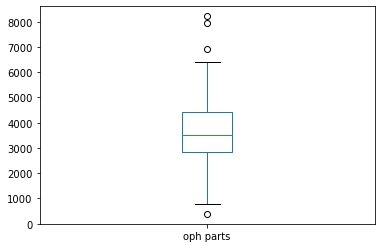

In [30]:
d[["oph parts"]].plot.box()

In [31]:
d['oph parts'].describe().astype(int)

count      35
mean     3781
std      1744
min       389
25%      2845
50%      3496
75%      4434
max      8215
Name: oph parts, dtype: int64

<AxesSubplot:xlabel='Engine Type', ylabel='oph'>

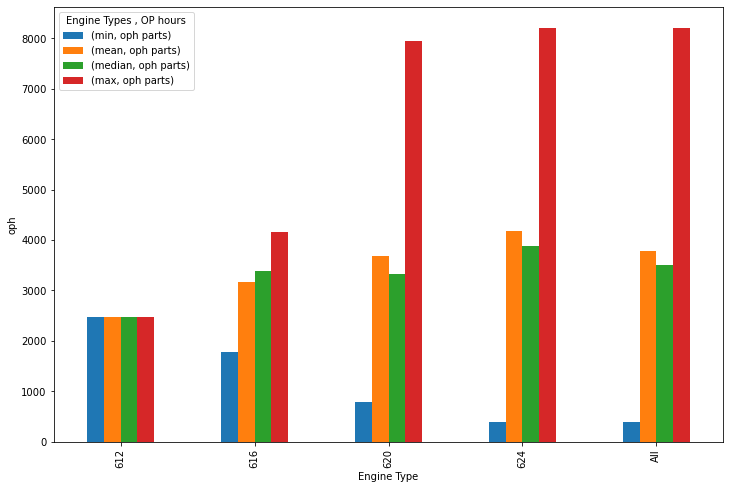

In [35]:
# lambda x: np.percentile(x, 50)
def median(x):
    return np.percentile(x,50)
d1 = d.pivot_table(index='Engine Type', values='oph parts', aggfunc=['min','mean',median,'max'], margins=True)
d1.columns=d1.columns.rename('Engine Types ', level=0)
d1.columns=d1.columns.rename(' OP hours', level=1)
d1.plot.bar(figsize=(12,8), ylabel='oph')

In [36]:
d.pivot_table(index='Engine Type', values='oph parts', aggfunc=['mean',median,'max','sum'], margins=True).round(1)

,mean,median,max,sum
,oph parts,oph parts,oph parts,oph parts
Engine Type,,,,
612,2474.0,2474.0,2474,2474
616,3176.8,3380.0,4152,28591
620,3676.8,3327.5,7956,22061
624,4169.3,3882.0,8215,79217
All,3781.2,3496.0,8215,132343


## Pivot Cum Validation hours per Engine Type

<AxesSubplot:xlabel='Engine Type', ylabel='oph'>

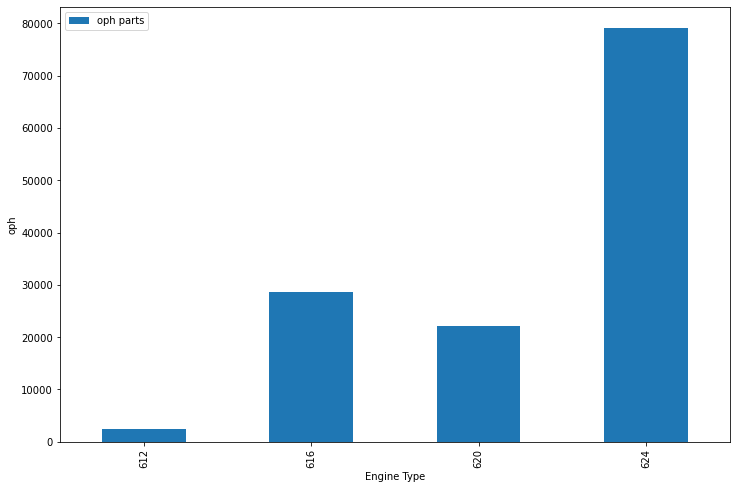

In [37]:
d.pivot_table(index='Engine Type', values='oph parts', aggfunc='sum', margins=False).plot.bar(figsize=(12,8), ylabel='oph')

In [38]:
# Select engine for detailed investigation
from pprint import pprint as pp
sn=1225799  #1320072
e=vl.eng_serialNumber(sn)
id = e.id
print(e)

1225799 M01 EC Mielec              


In [39]:
e.valstart_ts
arrow.get(e._d['val start'])

<Arrow [2021-02-25T00:00:00+00:00]>

In [40]:
# fetch Lube Oil Consuption data
locdef = {227: 'OilConsumption', 
          237: 'DeltaOpH',
          228: 'OilVolume', 
          225: 'ActiveEnergy', 
          226: 'AvgPower'}

limit = 2500

# call myplant
df = e.batch_hist_dataItems(itemIds=locdef, p_limit=2500 ,timeCycle=30)

# Set Type of time column to DateTime
df['datetime'] = pd.to_datetime(df['time'] * 1000000)

# Filter to Validation Period
df = df[df.datetime > pd.to_datetime(e._d['val start'])]

# Filter Oil Consumption outliers by < 3 * stdev
df = df[np.abs(df.OilConsumption-df.OilConsumption.mean())
        <= (3*df.OilConsumption.std())]

# Calc Rolling Mean values
df['LOC'] = df.OilConsumption.rolling(10).mean()
df['Pow'] = df.AvgPower.rolling(10).mean()


In [41]:
#df.head(5)

(1000.0, 5000.0)

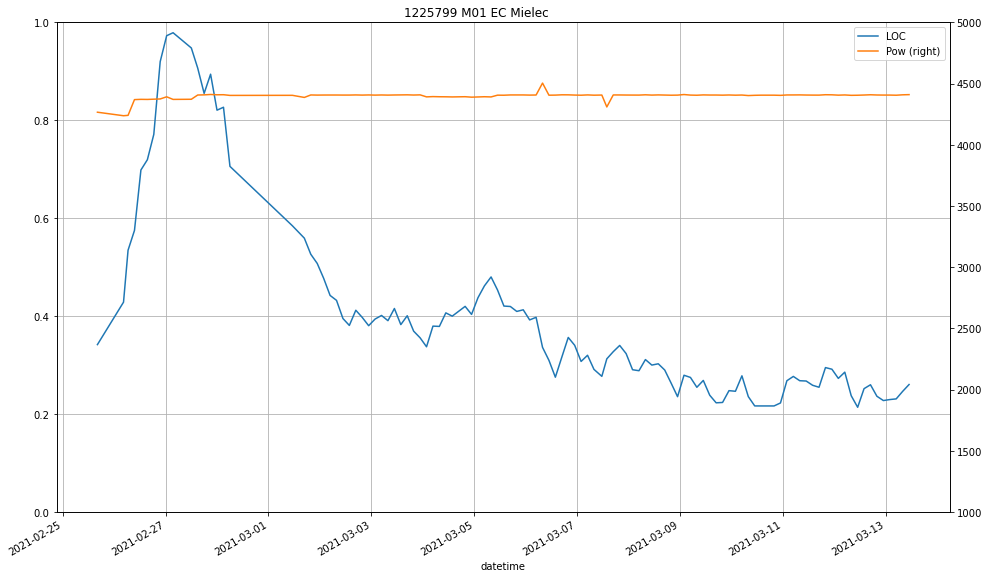

In [42]:
dfl=df[['datetime','OilConsumption','LOC','AvgPower','Pow']]
dfl=df[['datetime','LOC','Pow']]
ax = dfl.plot(subplots=False, x='datetime', secondary_y=['AvgPower','Pow'], ylim=(0,1.0), figsize=(16,10), title=e, grid=True)
ax.set_ylim(1000,5000)

In [43]:
e=vl.eng_serialNumber(sn)
id = e.id

#parameters
#tto = arrow.now('Europe/Vienna')
#tto = arrow.get(2021,1,23,16,0)

#tfrom = arrow.get(e.valstart_ts)
#tfrom = arrow.get('2020-02-07')
#tfrom = tto.shift(months=-2) 

#tdef = {161: 'CountOph', 102: 'PowerAct'}
#ttimecycle='14400'
#tassetType='J-Engine'
#tincludeMinMax='false'
#tforceDownSampling='false'


In [45]:
df = e.batch_hist_dataItems(itemIds={161: 'CountOph', 102: 'PowerAct', 217: 'Hyd_PressCrankCase',16546: 'Hyd_PressOilDif'}, p_from=arrow.now('Europe/Vienna').shift(days=-7), p_to=arrow.now('Europe/Vienna'),timeCycle=30)
# Set Type of time column to DateTime
df['datetime'] = pd.to_datetime(df['time'] * 1000000)
df['CountOph'] = df.CountOph - e.oph_start


# Just include the data to plot
dfp = df[['datetime','CountOph','PowerAct','Hyd_PressCrankCase','Hyd_PressOilDif']]
dfp.round(1)

,datetime,CountOph,PowerAct,Hyd_PressCrankCase,Hyd_PressOilDif
0,2021-03-07 14:55:21,222.0,4408.2,-37.1,0.8
1,2021-03-07 14:55:51,222.0,4422.2,-38.0,0.8
2,2021-03-07 14:56:21,222.0,4405.9,-38.0,0.8
3,2021-03-07 14:56:51,222.0,4407.8,-38.8,0.8
4,2021-03-07 14:57:21,222.0,4404.2,-38.8,0.8
...,...,...,...,...,...
20155,2021-03-14 14:52:51,390.0,4403.7,-39.0,0.8
20156,2021-03-14 14:53:21,390.0,4406.8,-40.0,0.8
20157,2021-03-14 14:53:51,390.0,4406.1,-38.1,0.8
20158,2021-03-14 14:54:21,390.0,4406.0,-38.0,0.8


array([<AxesSubplot:label='3a3112c7-c9a5-43fa-bde2-c03a5e111bc9', xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

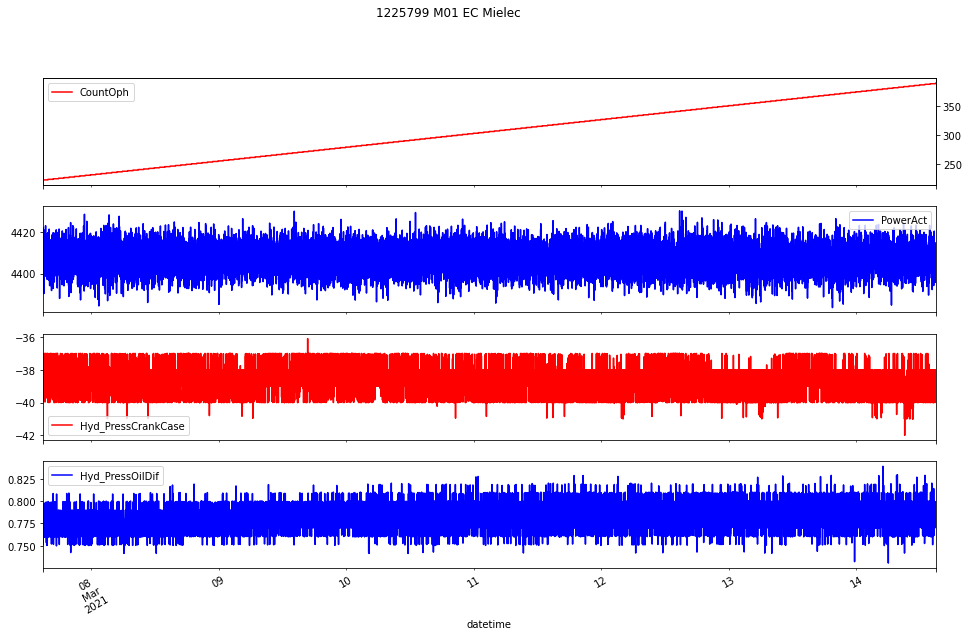

In [46]:
dfp.plot(subplots=True, x='datetime', color=['red','blue'], secondary_y = ['CountOph'], figsize=(16,10), title=e)


In [47]:
dfp.describe().round(1)

,CountOph,PowerAct,Hyd_PressCrankCase,Hyd_PressOilDif
count,20160.0,20160.0,20160.0,20160.0
mean,305.6,4407.1,-38.5,0.8
std,48.5,6.1,0.8,0.0
min,222.0,4383.5,-42.0,0.7
25%,264.0,4403.1,-39.0,0.8
50%,306.0,4407.1,-38.1,0.8
75%,348.0,4411.1,-38.0,0.8
max,390.0,4430.4,-36.1,0.8


In [50]:
# Alarms
"""
Get pandas dataFrame of Events history, either limit or From & to are required
batch_hist_alarms(self, p_severities=[600, 800], p_offset=0, p_limit=None, p_from=None, p_to=None)
p_severities          list   600,650 ... operational messages
                           700 ... warnings
                           800 ... alarms
p_offset            int64, number of messages to skip 
p_limit             int64, number of messages to download
p_from              string timestamp in milliseconds.
p_to                string timestamp in milliseconds.
"""
dm = e.batch_hist_alarms(p_severities=[800], p_offset=0, p_limit=10)
dm['datetime'] = pd.to_datetime(dm['timestamp'] * 1000000.0).dt.strftime("%d.%m.%Y %H:%m")
print(e, '\n')
print(tabulate(dm[['datetime','message','severity']], headers=['n','datetime','message','severity']))

1225799 M01 EC Mielec               

  n  datetime          message                                                            severity
---  ----------------  ---------------------------------------------------------------  ----------
  0  05.03.2021 05:03  LEANOX controller allowed deviation exceeded                            800
  1  01.03.2021 10:03  Generator frequency too low                                             800
  2  25.02.2021 16:02  Turbocharger pre-lube pressure minimum                                  800
  3  25.02.2021 16:02  Measuring signal failure pressure after turbocharger oil filter         800
  4  25.02.2021 16:02  Pressure after turbocharger oil filter maximum                          800
  5  24.02.2021 16:02  Synchronizing failure                                                   800
  6  24.02.2021 11:02  Engine oil level low                                                    800
  7  24.02.2021 09:02  SAFI  parameter failure                         

<AxesSubplot:ylabel='Name'>

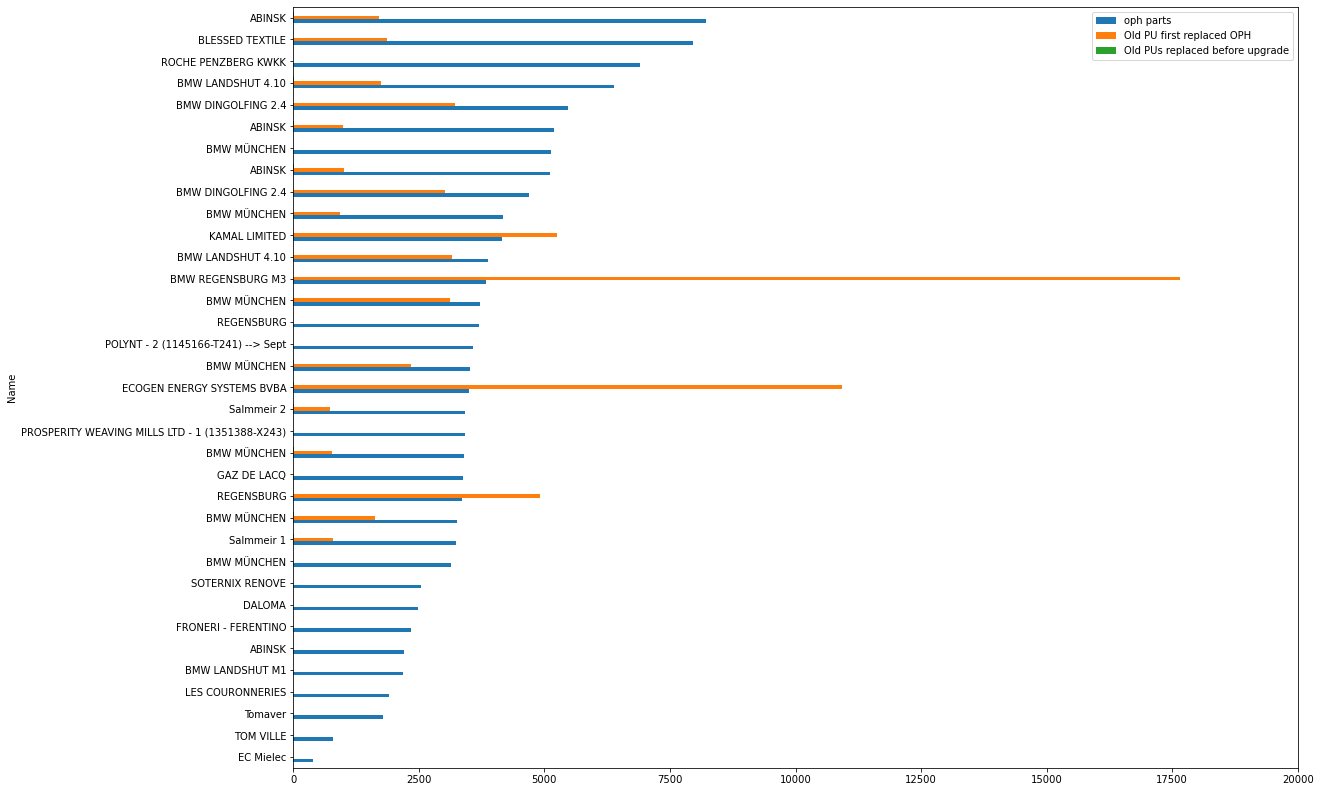

In [48]:
#dd = pd.DataFrame([])
#dd = d
#dd['Name'] = d['Name'] + ' ' + d['Engine Type'] + ' ' + d['Engine Version'] + ' ' + d['Engine ID']
#dc = pd.DataFrame([])
dc =  pd.concat([d[['Name','oph parts']], dval[['Old PU first replaced OPH','Old PUs replaced before upgrade']]],axis=1).set_index('Name').sort_values(by = "oph parts",ascending=True)
#print(dc)

dc.plot.barh(figsize=(18,14), xlim=(0,20000))
#dc.plot.scatter(x='Old PU first replaced OPH',y='Name',s='Old PUs replaced before upgrade')
# Please write SerialNumber of interesting Validation engine into sn: 
#sn=1393153

#for e in vl.engines:
#    print(e)
#    df = e.batch_hist_dataItems(itemIds={161: 'CountOph', 102: 'PowerAct'}, p_from=arrow.now('Europe/Vienna').shift(days=-7), p_to=arrow.now('Europe/Vienna'),timeCycle=3600)
#    # Set Type of time column to DateTime
#    df['datetime'] = pd.to_datetime(df['time'] * 1000000)
#    df['CountOph'] = df.CountOph - e._d['oph@start']
#
#    #dt = e.batch_hist_dataItems().plot(subplots=False, x='time', color=['red','black','blue'], secondary_y = ['CountOph'], figsize=(16,10))
#    df.plot(subplots=True, x='datetime', color=['red','black','blue'], y = ['CountOph','PowerAct'], title = e, figsize=(16,10))
#
#plt.show()

# print('----')
# for i, e in enumerate(vl.engines):
#    print(f"{i:02d} {e} {e.historical_dataItem(161, e.now_ts):6.0f} oph")


In [49]:
dat = {
    161: 'CountOph', 
    102: 'PowerAct', 
    217: 'Hyd_PressCrankCase',
    16546: 'Hyd_PressOilDif'
    #,1001101: 'RMD_ListBuffMAvgOilConsume_OilConsumption'
}

df = e.batch_hist_dataItems(
    itemIds=dat, 
    #p_from=arrow.get(arrow.get(e.valstart_ts)), # 
    p_from=arrow.now('Europe/Vienna').shift(months=-1), 
    p_to=arrow.now('Europe/Vienna'),
    timeCycle=10*60)


# Set Type of time column to DateTime
df['datetime'] = pd.to_datetime(df['time'] * 1000000)
df['CountOph'] = df.CountOph - e.oph_start

In [53]:
df

,time,Hyd_PressOilDif,PowerAct,Hyd_PressCrankCase,CountOph,datetime
0,1613252443000,0.000000,0.000000,-100.000000,0.000000,2021-02-13 21:40:43
1,1613253043000,0.000000,0.000000,-100.000000,0.000000,2021-02-13 21:50:43
2,1613253643000,0.000000,0.000000,-100.000000,0.000000,2021-02-13 22:00:43
3,1613254243000,0.000000,0.000000,-100.000000,0.000000,2021-02-13 22:10:43
4,1613254843000,0.000000,0.000000,-100.000000,0.000000,2021-02-13 22:20:43
...,...,...,...,...,...,...
4027,1615668643000,0.784703,4408.003433,-38.367708,371.951198,2021-03-13 20:50:43
4028,1615669243000,0.784837,4404.820993,-38.915915,372.000000,2021-03-13 21:00:43
4029,1615669843000,0.782771,4406.907390,-38.669428,372.000000,2021-03-13 21:10:43
4030,1615670443000,0.789210,4405.947102,-38.974038,372.000000,2021-03-13 21:20:43


In [50]:
# Filter outliers by < 3 * stdev
#df = df[np.abs(df.Hyd_PressCrankCase-df.Hyd_PressCrankCase.mean())
#        <= (2*df.Hyd_PressCrankCase.std())]
dff = df[df.Hyd_PressCrankCase <= 10.0]
#dff = dff[dff.PowerAct > 4000.0]

# Just include the data to plot
dfp = dff[['datetime','CountOph','PowerAct','Hyd_PressCrankCase','Hyd_PressOilDif']]
#dfp['PowerAct'] = dfp.PowerAct.rolling(5).mean()
#dfp['Hyd_PressCrankCase'] = dfp.Hyd_PressCrankCase.rolling(20).mean()
#dfp.round(1)
dfp.set_index('datetime')

,CountOph,PowerAct,Hyd_PressCrankCase,Hyd_PressOilDif
datetime,,,,
2021-02-14 14:56:00,0.000000,0.000000,-100.000000,0.000000
2021-02-14 15:06:00,0.000000,0.000000,-100.000000,0.000000
2021-02-14 15:16:00,0.000000,0.000000,-100.000000,0.000000
2021-02-14 15:26:00,0.000000,0.000000,-100.000000,0.000000
2021-02-14 15:36:00,0.000000,0.000000,-100.000000,0.000000
...,...,...,...,...
2021-03-14 14:06:00,389.000000,4407.446353,-38.590027,0.788442
2021-03-14 14:16:00,389.000000,4408.219252,-38.859218,0.783937
2021-03-14 14:26:00,389.000000,4405.394352,-38.835208,0.782528


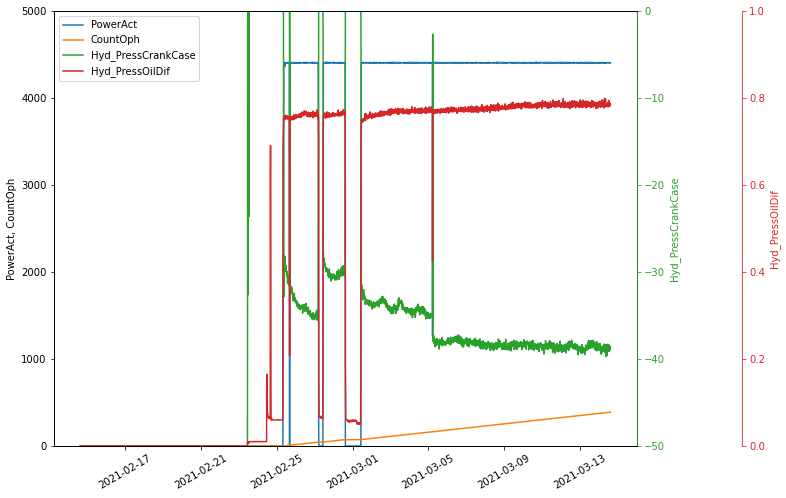

In [51]:
dmyplant2.chart(dfp, [
    {'col': ['PowerAct','CountOph'],'ylim': [0, 5000]},
    #{'col': ['CountOph'],'ylim': [0, 500]},
    {'col': ['Hyd_PressCrankCase'],'ylim': [-50, 0]},
    {'col': ['Hyd_PressOilDif'],'ylim': [0, 1]}
])

PowerAct
(-0.01, 180.0]      35.6
(180.0, 360.0]       0.3
(360.0, 540.0]       0.4
(540.0, 720.0]       0.0
(720.0, 900.0]       0.1
(900.0, 1080.0]      0.3
(1080.0, 1260.0]     0.1
(1260.0, 1440.0]     0.1
(1440.0, 1620.0]     0.1
(1620.0, 1800.0]     0.1
(1800.0, 1980.0]     0.0
(1980.0, 2160.0]     0.0
(2160.0, 2340.0]     0.3
(2340.0, 2520.0]     0.3
(2520.0, 2700.0]     0.1
(2700.0, 2880.0]     0.4
(2880.0, 3060.0]     0.3
(3060.0, 3240.0]     0.4
(3240.0, 3420.0]     0.6
(3420.0, 3600.0]     1.6
(3600.0, 3780.0]     1.3
(3780.0, 3960.0]     2.5
(3960.0, 4140.0]     4.9
(4140.0, 4320.0]     3.7
(4320.0, 4500.0]    46.0
Name: PowerAct, dtype: float64
Summe: 100.00000000000001%


<AxesSubplot:ylabel='PowerAct'>

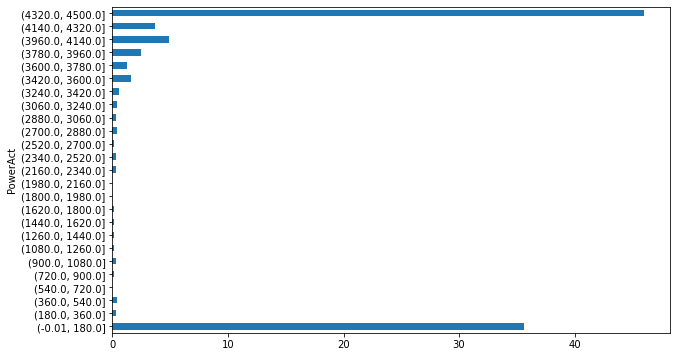

In [48]:

#dfp.PowerAct
#Calculate the number f engines in certain oph ranges
p = e.P_nominal
#ranges = [-0.1,2000,4000,6000]
ival=25
ranges = np.arange(0,ival+1,1)*p/ival
ranges[0] = ranges[0] - 0.01

#Method 1: using cut and groupby
r = dfp['PowerAct'].groupby(pd.cut(dfp['PowerAct'], ranges)).count()
rr = np.around(r / dfp['PowerAct'].count()*100,1)
print(rr)

print(f"Summe: {sum(r / dfp['PowerAct'].count()*100)}%")
rr.plot.barh(figsize=(10,6),ylim=(0,50))

#Method 2: simpler, direct using pd.value_counts
#dfp['PowerAct'].value_counts(bins=ranges, sort=False).astype(int).plot.bar(ylim=(0,20))
#dfp['PowerAct'].value_counts(bins=ranges, sort=False).astype(int)